In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np

# import modules/downloads

import pandas as pd
import re
# from wordcloud import WordCloud

import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import gensim.corpora as corpora

import pyLDAvis

import os

from gensim.utils import simple_preprocess
from gensim.models import Phrases
from gensim.models.phrases import Phraser

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\henry\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
train = pd.read_csv("./train.txt", sep=";")
train.columns = ["text","sentiment"]
test = pd.read_csv("./test.txt", sep=";")
test.columns = ["text","sentiment"]
train.head()

C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,sentiment
0,i can go from feeling so hopeless to so damned...,sadness
1,im grabbing a minute to post i feel greedy wrong,anger
2,i am ever feeling nostalgic about the fireplac...,love
3,i am feeling grouchy,anger
4,ive been feeling a little burdened lately wasn...,sadness


In [3]:
train_text = train.text
test_text = test.text
if len(train_text) == len(test_text):
    print("is equal")
else:
    print("not equal")
    print("train values length: " + str(len(train_text)) + ", and test values length: " + str(len(test_text)))


not equal
train values length: 15999, and test values length: 1999


C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# function to get unique values
def unique(list1):
 
    # initialize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Preprocessing

In [5]:
topics = unique(train['sentiment'])
len(topics)
print(topics)

['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']


C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
y_topic_train = train['sentiment']
y_topic_test = test['sentiment']

y_train = np.array([topics.index(k) for k in train['sentiment']])
y_test = np.array([topics.index(k) for k in test['sentiment']])

print(y_train, len(unique(y_train)))

[0 1 2 ... 5 1 0] 6


C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=5000, min_df=3, binary=True, 
                             stop_words="english")
X = vectorizer.fit_transform(train_text)
X_test = vectorizer.transform(test_text)
X.shape, X_test.shape

C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


((15999, 4885), (1999, 4885))

In [21]:
n, d = X.shape
k = 6
X.shape

C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(15999, 4885)

In [22]:
#Data transformation
temp = np.zeros((len(y_train),k))
for i in range(n):
    temp[i,y_train[i]] = 1

C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
from sklearn.metrics import v_measure_score

def breakdown_clusters_by_ground_truth(y_true, cluster_labels, display=True) :
    """
    If display = True, 
        display counts of documents of each topic in each of the generated
        clusters and plot the same.-
        
    Returns v-measure of cluster labels with respect to ground truth
    """
    
    assert len(y_true) == len(cluster_labels), "Length of Target and cluster labels don't match"
    df = pd.DataFrame({'topic' : y_true, 'cluster' : cluster_labels})
    counts = df.groupby(['topic', 'cluster']).size().reset_index().rename(columns={0:'count'})
    if display :
        print(counts)
        sns.barplot(x="topic", y="count", hue="cluster", data=counts)
    return v_measure_score(y_true, cluster_labels)



C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
from sklearn.naive_bayes import _BaseDiscreteNB, MultinomialNB

class SoftMultinomialNB(MultinomialNB):

    # Note y = numpy array of size n x k containing 
    # for each example n, the probability of it belonging to class k.
    
    def fit(self, X, y, sample_weight=None):        
      _, n_features = X.shape
      self.n_features_in_ = n_features 

      Y = y
      self.classes_ = np.arange(Y.shape[1])

      if sample_weight is not None:
          Y = Y.astype(np.float64, copy=False)
          sample_weight = np.asarray(sample_weight)
          sample_weight = np.atleast_2d(sample_weight)
          Y *= check_array(sample_weight).T

      class_prior = self.class_prior

      # Count raw events from data before updating the class log prior
      # and feature log probas
      n_effective_classes = Y.shape[1]

      self._init_counters(n_effective_classes, n_features)
      self._count(X, Y)
      alpha = self._check_alpha()
      self._update_feature_log_prob(alpha)
      self._update_class_log_prior(class_prior=class_prior)
      return self

C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0 0 4 ... 5 5 4]
(1999, 4885) (1999,)
The f1 score of fully trained model = 0.7806264577724985
       topic  cluster  count
0      anger        0     15
1      anger        1    232
2      anger        2      5
3      anger        3      3
4      anger        4     13
5      anger        5      7
6       fear        0     17
7       fear        1     11
8       fear        2      2
9       fear        3      8
10      fear        4    182
11      fear        5      4
12       joy        0     14
13       joy        1     13
14       joy        2     58
15       joy        3     14
16       joy        4     11
17       joy        5    585
18      love        0      4
19      love        1      5
20      love        2    132
21      love        3      2
22      love        5     16
23   sadness        0    501
24   sadness        1     25
25   sadness        2     13
26   sadness        3     10
27   sadness        4     12
28   sadness        5     19
29  surprise        0      3
30  s

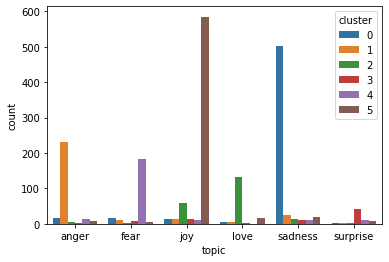

In [29]:
from sklearn.metrics import f1_score

train_eval = lambda cluster_labels, d=True: breakdown_clusters_by_ground_truth(y_topic_train, cluster_labels, d)
test_eval = lambda cluster_labels, d=True: breakdown_clusters_by_ground_truth(y_topic_test, cluster_labels, d)

full_trained_model = SoftMultinomialNB(fit_prior=False)
full_trained_model.fit(X, temp)
prediction = full_trained_model.predict(X_test)
print(prediction)
print(X_test.shape, y_test.shape)

print(f'The f1 score of fully trained model = {f1_score(prediction, y_test,average="macro")}')
print(f'The v-measure of fully trained model = {test_eval(prediction, d=True)}')